# Chatbot
- A chatbot that can answer questions based on a 'story' given to the bot

In [2]:
import pickle
import numpy as np

with open('/data/notebook_files/train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

with open('/data/notebook_files/test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [3]:
type(test_data)

list

In [4]:
len(train_data)

10000

In [5]:
len(test_data)

1000

In [6]:
train_data[0]

# we can see that it is in terms of story, question, and answer

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

# Set up a vocab of all the words inside our data

In [7]:
all_data = test_data + train_data

vocab = set()
# get a set of unique words
for story, question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question)) 

In [8]:
vocab.add('no')
vocab.add('yes')

In [15]:
vocab
# we are limited only to these words that we can use to ask questions later

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [9]:
vocab_len = len(vocab) + 1 # b/c keras need a place holder
vocab_len

38

In [10]:
# longest story

all_story_lens = [len(data[0]) for data in all_data]
max_story_len = max(all_story_lens)
max_story_len

156

In [11]:
max_question_len = max([len(data[1]) for data in all_data])

max_question_len

6

In [12]:
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer

# create integer encoding
tokenizer = Tokenizer(filters=[])  # we don't want any filters
tokenizer.fit_on_texts(vocab)

tokenizer.word_index

{'is': 1,
 '?': 2,
 'to': 3,
 'journeyed': 4,
 'sandra': 5,
 'travelled': 6,
 'bathroom': 7,
 'dropped': 8,
 'picked': 9,
 'put': 10,
 'milk': 11,
 'yes': 12,
 'went': 13,
 'the': 14,
 'back': 15,
 'up': 16,
 'there': 17,
 'kitchen': 18,
 'daniel': 19,
 '.': 20,
 'grabbed': 21,
 'mary': 22,
 'discarded': 23,
 'got': 24,
 'no': 25,
 'left': 26,
 'in': 27,
 'took': 28,
 'garden': 29,
 'football': 30,
 'bedroom': 31,
 'down': 32,
 'john': 33,
 'moved': 34,
 'office': 35,
 'apple': 36,
 'hallway': 37}

In [13]:
# separate the story, question and answer separate from each other
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [17]:
# Converting texts into matching word index
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

# vectoring
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len = max_story_len, max_question_len=max_question_len):
    # stories
    X = []
    # questions
    Xq = []
    # correct answer
    Y = []

    for story,query,answer in data:
        # for each story
        # create the index list
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query] # question
        y = np.zeros(len(word_index)+1)

        y[word_index[answer]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)

    return(pad_sequences(X, maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [18]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

inputs_test

array([[ 0, 0, 0, ..., 14, 31, 20],
 [ 0, 0, 0, ..., 14, 29, 20],
 [ 0, 0, 0, ..., 14, 29, 20],
 ...,
 [ 0, 0, 0, ..., 14, 36, 20],
 [ 0, 0, 0, ..., 14, 29, 20],
 [ 0, 0, 0, ..., 36, 17, 20]], dtype=int32)

In [19]:
tokenizer.word_index['yes']

12

In [20]:
tokenizer.word_index['no']

25

In [21]:
sum(answers_test)

array([ 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 497., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 503., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0.])

In [22]:
from keras.models import Sequential,Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [24]:
# create placeholders, shape = max_story_len, and batch_size is None because we haven't define it yet
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

# create input encoders
# vocab_len
vocab_size = len(vocab) + 1

# Input encoder M
# This input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
input_encoder_m.add(Dropout(0.3))

# output is samples, story_maxlen, embidding_dim



# Input encoder C
# This input gets embedded to a sequence of vectors
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

# output is samples, story_len, max_question_len

# Question encoder
# This input gets embedded to a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_question_len))
question_encoder.add(Dropout(0.3))

# output: samples, query_maxlen, embedding_di

In [25]:
# encoded <--- encoder(input)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_endcoded = question_encoder(question)

In [26]:
match = dot([input_encoded_m, question_endcoded], axes = (2,2))
match = Activation('softmax')(match)

response = add([match, input_encoded_c])
response = Permute((2,1))(response)

In [27]:
answer = concatenate([response, question_endcoded])
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [28]:
answer = LSTM(32)(answer)
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [29]:
answer = Activation('softmax')(answer)
model = Model([input_sequence, question], answer)

In [30]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_2 (Sequential)      (None, None, 64)     2432        ['input_3[0][0]']                
                                                                                                  
 sequential_4 (Sequential)      (None, 6, 64)        2432        ['input_4[0][0]']                
                                                                                              

In [35]:
# Train and evaluate the model

history = model.fit([inputs_train, queries_train], answers_train, batch_size=32, epochs=100, validation_data=([inputs_test, queries_test], answers_test))

Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6945 - accuracy: 0.5080 - val_loss: 0.6933 - val_accuracy: 0.5010
Epoch 6/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6943 - accuracy: 0.4972 - val_loss: 0.6942 - val_accuracy: 0.4970
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6933 - accuracy: 0.5106 - val_loss: 0.6940 - val_accuracy: 0.5160
Epoch 8/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6853 - accuracy: 0.5395 - val_loss: 0.6789 - val_accuracy: 0.5520
Epoch 9/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6650 - accuracy: 0.5904 - val_loss: 0.6483 - val_accuracy: 0.6340
Epoch 10/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6411 - accuracy: 0.6385 - val_loss: 0.6315 - val_accuracy: 0.6640
Epoch 11/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6325 - accuracy: 0.6458 - val_loss: 0.6217 - val_accurac

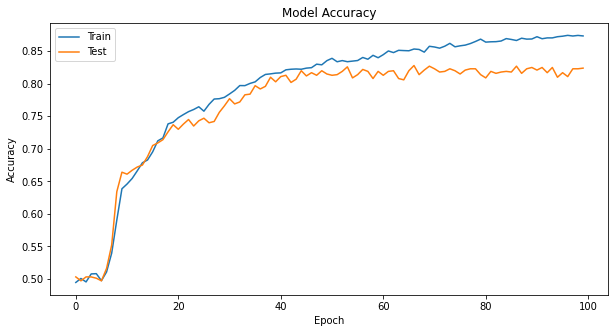

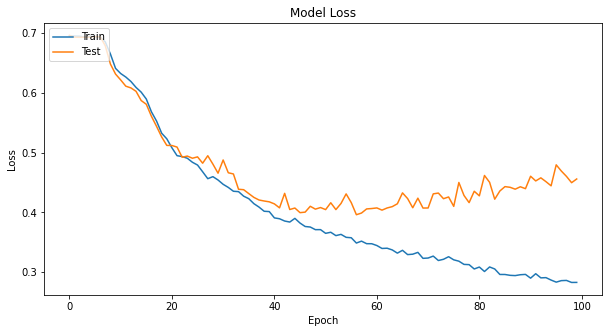

In [36]:
# plot out the training history 
# plot training history
import matplotlib.pyplot as plt

# Accuracy history
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss history
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [37]:
model.save('myq&amodel.h5')

In [38]:
model.load_weights('myq&amodel.h5')

In [39]:
pred_results = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 1s 3ms/step


In [44]:
test_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [42]:
pred_results[0] # This is the probabilities of every single vocab word

array([5.2517372e-08, 5.2068540e-08, 5.0102102e-08, 5.1715197e-08,
 5.3971352e-08, 5.2489931e-08, 4.7530808e-08, 5.8169473e-08,
 5.6314978e-08, 5.2488929e-08, 4.7109047e-08, 5.9724549e-08,
 1.6204315e-01, 5.4158619e-08, 5.0140340e-08, 5.8549826e-08,
 5.0480327e-08, 4.7382905e-08, 5.3243866e-08, 4.9117293e-08,
 5.0849856e-08, 4.5506116e-08, 5.2194121e-08, 4.7462052e-08,
 4.9394444e-08, 8.3795494e-01, 5.1951282e-08, 5.1892457e-08,
 5.1664816e-08, 5.2007298e-08, 5.7821030e-08, 4.8576737e-08,
 5.0085092e-08, 5.3687362e-08, 4.8905186e-08, 4.9668415e-08,
 5.2830526e-08, 4.8765653e-08], dtype=float32)

In [47]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

k

'no'

In [48]:
pred_results[0][val_max]

# the model is 83% sure 

0.83795494

In [49]:
# Predict on our own queries

my_story = 'John left the kitchen . Sandra dropped the football in the garden . '
# we need the spaces, because we need to make sure it is in the same format as it was trained on

my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [50]:
my_question = 'Is the football in the garden ?'

my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [51]:
# create a new dataset of one single story, question, and asnwer

my_data = [(my_story.split(), my_question.split(), 'yes')]

In [53]:
# vectorize our story, question and asnwer
my_story, my_ques, my_ans = vectorize_stories(my_data)

my_story

array([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33,
 26, 14, 18, 20, 5, 8, 14, 30, 27, 14, 29, 20]], dtype=int32)

In [54]:
pred_results = model.predict(([my_story, my_ques]))

val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

k

1/1 [==============================] - 0s 28ms/step


'yes'

In [55]:
pred_results[0][val_max]

0.85721254

In [61]:
# try to predict something outof a new story, but don't give it the answer of a yes or no 
# Your new story and question. Note it should have the same structure as the stories and questions it was trained on.
new_story = 'Mary moved to the bedroom . John went to the kitchen .'
new_question = 'Is John in the kitchen ?'

# Convert your story and question to the same format used for training.
new_data = [(new_story.split(), new_question.split(), 'no')] # we don't care the 'yes' here, because It doesn't affect the result

# Vectorize your new story and question
new_story, new_ques, new_ans = vectorize_stories(new_data)

# Use your trained model for prediction
new_pred_results = model.predict(([new_story, new_ques]))

# Decode your prediction to retrieve the answer
val_max = np.argmax(new_pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print(f'The answer is : {k}')

print(f'The model is {new_pred_results[0][val_max]*100} percent sure about this')

1/1 [==============================] - 0s 25ms/step
The answer is : yes
The model is 95.5431342124939 percent sure about this


In [66]:
# try to predict something outof a new story, but don't give it the answer of a yes or no 
# Your new story and question. Note it should have the same structure as the stories and questions it was trained on.
new_story = 'Mary moved to the bedroom . John left the football in the bedroom .'
new_question = 'Is John in the bedroom ?'

# Convert your story and question to the same format used for training.
new_data = [(new_story.split(), new_question.split(), 'no')] # we don't care the 'yes' here, because It doesn't affect the result

# Vectorize your new story and question
new_story, new_ques, new_ans = vectorize_stories(new_data)

# Use your trained model for prediction
new_pred_results = model.predict(([new_story, new_ques]))

# Decode your prediction to retrieve the answer
val_max = np.argmax(new_pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print(f'The answer is : {k}')

print(f'The model is {new_pred_results[0][val_max]*100} percent sure about this')

1/1 [==============================] - 0s 23ms/step
The answer is : yes
The model is 96.41889929771423 percent sure about this


In [65]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}